# Reading the signals etc

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.integrate import simps
from scipy.fft import fftshift
from tsfel.feature_extraction import features as tsfelf
import gpxpy 
import gpxpy.gpx 

In [2]:
from os import listdir
from os.path import isfile, join


In [3]:
def bpf(arr, fs, lf, hf, order):
    wbut = [lf, hf]
    bbut, abut = signal.butter(order, wbut, btype ='bandpass', fs = fs)

    return signal.filtfilt(bbut, abut, arr)

def hpf(arr, fs, lf, order):
    wbut = lf
    bbut, abut = signal.butter(order, wbut, btype ='highpass', fs =fs)

    return signal.filtfilt(bbut, abut, arr)


In [4]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_timestamps'
timestamps = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [5]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_gravel_and_wet_asphalt'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [6]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\22_Nov_2021_timestamps'
timestamps2 = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [7]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\timestamps_13_1_2022'
timestamps3 = [f for f in listdir(mypath) if isfile(join(mypath, f))]

timestamps3

['start_13_01_2022_14_44_07_wet_asphalt.csv',
 'start_13_01_2022_14_51_06_ice.csv',
 'start_13_01_2022_14_56_08_ice.csv',
 'start_13_01_2022_14_57_06_ice.csv',
 'start_13_01_2022_14_57_41_ice.csv',
 'start_13_01_2022_14_58_54_ice.csv',
 'start_13_01_2022_15_00_08_ice.csv',
 'start_13_01_2022_15_00_39_wet_asphalt.csv',
 'stop_13_01_2022_14_49_27_wet_asphalt.csv',
 'stop_13_01_2022_14_51_43_ice.csv',
 'stop_13_01_2022_14_56_31_ice.csv',
 'stop_13_01_2022_14_57_37_ice.csv',
 'stop_13_01_2022_14_57_43_ice.csv',
 'stop_13_01_2022_14_59_41_ice.csv',
 'stop_13_01_2022_15_00_15_ice.csv',
 'stop_13_01_2022_15_04_05_wet_asphalt.csv']

In [8]:

ice1_start = int('14_57_49')
ice1_stop = int('15_00_14')

ice2_start = int('14_52_32')
ice2_stop = int('14_56_25')

wasp1_start = int('15_00_35')
wasp1_stop = int('15_01_35')

wasp2_start = int('14_47_32')
wasp2_stop = int('14_49_25')




In [9]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\13.01.2022'
onlyfiles3 = [f for f in listdir(mypath) if isfile(join(mypath, f))]

onlyfiles3

['2022_14_37_37-Jan-13.wav',
 '2022_14_37_47-Jan-13.wav',
 '2022_14_37_57-Jan-13.wav',
 '2022_14_38_07-Jan-13.wav',
 '2022_14_38_17-Jan-13.wav',
 '2022_14_38_28-Jan-13.wav',
 '2022_14_38_38-Jan-13.wav',
 '2022_14_38_48-Jan-13.wav',
 '2022_14_38_58-Jan-13.wav',
 '2022_14_39_08-Jan-13.wav',
 '2022_14_39_19-Jan-13.wav',
 '2022_14_39_29-Jan-13.wav',
 '2022_14_39_39-Jan-13.wav',
 '2022_14_39_49-Jan-13.wav',
 '2022_14_39_59-Jan-13.wav',
 '2022_14_40_10-Jan-13.wav',
 '2022_14_40_20-Jan-13.wav',
 '2022_14_40_30-Jan-13.wav',
 '2022_14_40_40-Jan-13.wav',
 '2022_14_40_50-Jan-13.wav',
 '2022_14_41_00-Jan-13.wav',
 '2022_14_41_11-Jan-13.wav',
 '2022_14_41_21-Jan-13.wav',
 '2022_14_41_31-Jan-13.wav',
 '2022_14_41_41-Jan-13.wav',
 '2022_14_41_51-Jan-13.wav',
 '2022_14_42_02-Jan-13.wav',
 '2022_14_42_12-Jan-13.wav',
 '2022_14_42_22-Jan-13.wav',
 '2022_14_42_32-Jan-13.wav',
 '2022_14_42_42-Jan-13.wav',
 '2022_14_42_53-Jan-13.wav',
 '2022_14_43_03-Jan-13.wav',
 '2022_14_43_13-Jan-13.wav',
 '2022_14_43_2

In [10]:
ice_files = []
wasp_files2 = []

for i in range(len(onlyfiles3)):
    test = onlyfiles3[i]
    if wasp1_start < int(test[5:13]) < wasp1_stop:
        wasp_files2.append(test)
    if wasp2_start < int(test[5:13]) < wasp2_stop:
        wasp_files2.append(test)

    
    # Add ice
    if ice1_start < int(test[5:13]) < ice1_stop:
        ice_files.append(test)
    if ice2_start < int(test[5:13]) < ice2_stop:
        ice_files.append(test)


        
        

In [11]:
wasp_files2

['2022_14_47_38-Jan-13.wav',
 '2022_14_47_48-Jan-13.wav',
 '2022_14_47_58-Jan-13.wav',
 '2022_14_48_09-Jan-13.wav',
 '2022_14_48_19-Jan-13.wav',
 '2022_14_48_29-Jan-13.wav',
 '2022_14_48_39-Jan-13.wav',
 '2022_14_48_49-Jan-13.wav',
 '2022_14_49_00-Jan-13.wav',
 '2022_14_49_10-Jan-13.wav',
 '2022_14_49_20-Jan-13.wav',
 '2022_15_00_45-Jan-13.wav',
 '2022_15_00_55-Jan-13.wav',
 '2022_15_01_05-Jan-13.wav',
 '2022_15_01_15-Jan-13.wav',
 '2022_15_01_26-Jan-13.wav']

In [12]:
def read_data3(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\13.01.2022\\'+ str(r_id)
    sr, data = wavfile.read(link)
    return data

# Slicer to get proper values
def slicing(sig, segment_length):   # this here will slice depending on the timeframe you give it
    sig_sliced = []                 # for example 10*fs is 10 seconds, so it will slice the signal
                                    # into 10s long segments
    for i in np.arange(int(len(sig)/segment_length)):
        sig_sliced.append( sig[i*segment_length:(i+1)*segment_length] )
        
    return (sig_sliced)

In [13]:
def get_features(data, surface):
    columns = ["Surface"]
    features = ["RMS", "RMSf", "Spec", "Specf", "ZC", "ZCf", "Specslo", "Specslof", "Specspr", "Specsprf", "STD", "STDf"]
    a = 0
    fs = 44100
    df = pd.DataFrame(columns = columns)
    for i in range(len(data)):
        r_id = data[i]
        #Read the signals
        sig = read_data3(r_id)
        
        sli = slicing(sig, 3*fs)
        
        for sig in sli:
            df.loc[a, "ID"] = r_id
            df.loc[a, "Surface"] = surface

            s_f = hpf(sig, fs, 65, 2)
            df.loc[a, "RMS"] = np.sqrt(np.mean(sig**2))
            df.loc[a, "RMS_filt"] = np.sqrt(np.mean(s_f**2))

            df.loc[a, "Zero-Cross"] = tsfelf.zero_cross(sig)
            df.loc[a, "Zero-Cross_filt"] = tsfelf.zero_cross(s_f)

            df.loc[a, "Spectral_centroid"] = tsfelf.spectral_centroid(sig, fs)
            df.loc[a, "Spectral_centroid_filt"] = tsfelf.spectral_centroid(s_f, fs)

            df.loc[a, "Spectral_slope"] = tsfelf.spectral_slope(sig, fs)
            df.loc[a, "Spectral_slope_filt"] = tsfelf.spectral_slope(s_f, fs) 

            df.loc[a, "Spectral_spread"] = tsfelf.spectral_spread(sig, fs)
            df.loc[a, "Spectral_spread_filt"] = tsfelf.spectral_spread(s_f, fs) 

            df.loc[a, "STD"] = np.std(sig)

            df.loc[a, "STD_filt"] = np.std(s_f)

            print(a, end=',')
            a = a+1
    return df
        

In [14]:
slipperydf = get_features(ice_files, "Slippery")
nonslipperydf = get_features(wasp_files2, "Non-slippery")



0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,

In [29]:
#Adding all of the dataframes together.

alldf = pd.concat([slipperydf, nonslipperydf])

alldf

,Surface,ID,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Slippery,2022_14_52_35-Jan-13.wav,47.621167,353.810116,2250.0,2480.0,827.032141,890.422534,-3.804825e-09,-3.781175e-09,1725.512294,1658.850992,405.670286,353.810116
1,Slippery,2022_14_52_35-Jan-13.wav,31.932822,971.302582,2661.0,2861.0,784.673550,780.431286,-3.820629e-09,-3.822212e-09,1712.768773,1423.039811,1092.155360,971.302571
2,Slippery,2022_14_52_35-Jan-13.wav,29.621232,989.823393,2960.0,3241.0,916.752204,842.722385,-3.771351e-09,-3.798971e-09,1865.656003,1220.143303,1122.561158,989.823270
3,Slippery,2022_14_52_46-Jan-13.wav,28.652431,943.185988,3121.0,3458.0,834.027281,868.166771,-3.802215e-09,-3.789478e-09,1436.577872,1159.456021,1111.883641,943.185905
4,Slippery,2022_14_52_46-Jan-13.wav,30.247030,842.396283,3234.0,3698.0,833.882582,929.143805,-3.802269e-09,-3.766728e-09,1217.860875,1263.966525,988.616101,842.396159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,Non-slippery,2022_15_01_15-Jan-13.wav,39.942134,486.780194,3508.0,3575.0,842.587802,899.597709,-3.799022e-09,-3.777751e-09,1289.677178,1341.138557,515.787597,486.780151
44,Non-slippery,2022_15_01_15-Jan-13.wav,37.667976,530.610408,3360.0,3407.0,815.599846,869.062981,-3.809091e-09,-3.789144e-09,1262.366110,1300.349073,560.651641,530.610388
45,Non-slippery,2022_15_01_26-Jan-13.wav,37.498385,544.294251,3173.0,3334.0,793.227414,848.283110,-3.817438e-09,-3.796897e-09,1262.669878,1270.849466,586.012926,544.294207
46,Non-slippery,2022_15_01_26-Jan-13.wav,37.421018,551.820253,3179.0,3295.0,805.047226,852.336729,-3.813028e-09,-3.795384e-09,1313.633258,1327.029549,586.699236,551.820204


In [30]:
alldf.to_csv(r'C:\\Users\\Owner\\Downloads\\CapstoneData\\DataFrame_17_01.csv', index = False)

# Data analysis. 

### Different surfaces and their features boxplotted.

In [31]:
import seaborn as sns

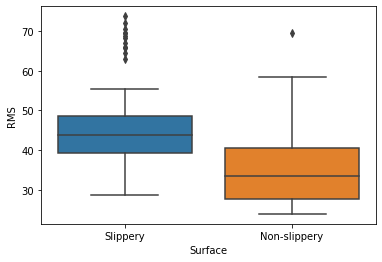

In [32]:
fig = sns.boxplot(data=alldf, x="Surface", y="RMS")

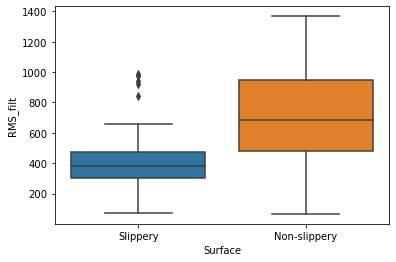

In [33]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="RMS_filt")

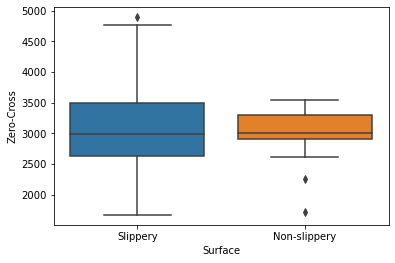

In [34]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Zero-Cross")

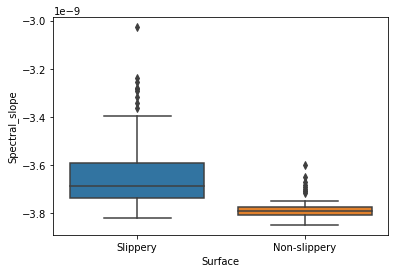

In [35]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Spectral_slope")

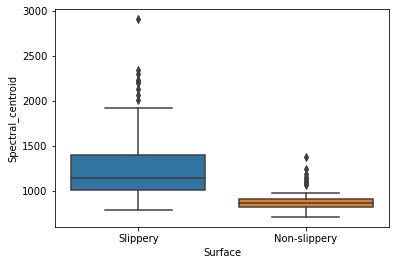

In [36]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Spectral_centroid")

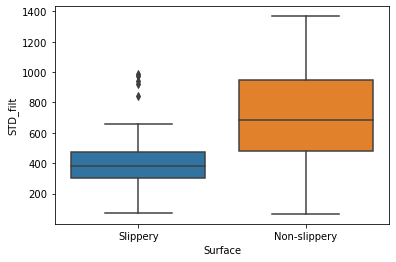

In [37]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="STD_filt")

In [38]:
alldf

,Surface,ID,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Slippery,2022_14_52_35-Jan-13.wav,47.621167,353.810116,2250.0,2480.0,827.032141,890.422534,-3.804825e-09,-3.781175e-09,1725.512294,1658.850992,405.670286,353.810116
1,Slippery,2022_14_52_35-Jan-13.wav,31.932822,971.302582,2661.0,2861.0,784.673550,780.431286,-3.820629e-09,-3.822212e-09,1712.768773,1423.039811,1092.155360,971.302571
2,Slippery,2022_14_52_35-Jan-13.wav,29.621232,989.823393,2960.0,3241.0,916.752204,842.722385,-3.771351e-09,-3.798971e-09,1865.656003,1220.143303,1122.561158,989.823270
3,Slippery,2022_14_52_46-Jan-13.wav,28.652431,943.185988,3121.0,3458.0,834.027281,868.166771,-3.802215e-09,-3.789478e-09,1436.577872,1159.456021,1111.883641,943.185905
4,Slippery,2022_14_52_46-Jan-13.wav,30.247030,842.396283,3234.0,3698.0,833.882582,929.143805,-3.802269e-09,-3.766728e-09,1217.860875,1263.966525,988.616101,842.396159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,Non-slippery,2022_15_01_15-Jan-13.wav,39.942134,486.780194,3508.0,3575.0,842.587802,899.597709,-3.799022e-09,-3.777751e-09,1289.677178,1341.138557,515.787597,486.780151
44,Non-slippery,2022_15_01_15-Jan-13.wav,37.667976,530.610408,3360.0,3407.0,815.599846,869.062981,-3.809091e-09,-3.789144e-09,1262.366110,1300.349073,560.651641,530.610388
45,Non-slippery,2022_15_01_26-Jan-13.wav,37.498385,544.294251,3173.0,3334.0,793.227414,848.283110,-3.817438e-09,-3.796897e-09,1262.669878,1270.849466,586.012926,544.294207
46,Non-slippery,2022_15_01_26-Jan-13.wav,37.421018,551.820253,3179.0,3295.0,805.047226,852.336729,-3.813028e-09,-3.795384e-09,1313.633258,1327.029549,586.699236,551.820204


# MACHINE LEARNING PART

### This time I split the gravel instances into two: wet and dry.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [40]:
features

NameError: name 'features' is not defined

In [41]:
features = ["RMS", "RMS_filt", "Zero-Cross", "Zero-Cross_filt", "Spectral_centroid", "Spectral_centroid_filt", "Spectral_slope", "Spectral_slope_filt","Spectral_spread", "Spectral_spread_filt", "STD", "STD_filt"] 

In [42]:
features = ["RMS", "RMS_filt", "Zero-Cross", "Zero-Cross_filt", "Spectral_centroid", "Spectral_centroid_filt", "Spectral_slope", "Spectral_slope_filt","Spectral_spread", "Spectral_spread_filt", "STD", "STD_filt"] 

In [43]:

# post processing, standardize the data

#remove na values
alldf = alldf.dropna()

scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object

#with these 3 features only, we can get almost perfect score...

alldf[features] = scaler.fit_transform(alldf[features])

alldf

,Surface,ID,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Slippery,2022_14_52_35-Jan-13.wav,0.469569,-0.514985,-1.408028,-1.379385,-0.892950,-0.900465,-0.892950,-0.900465,-0.470716,-0.478863,-0.556568,-0.514985
1,Slippery,2022_14_52_35-Jan-13.wav,-1.018446,1.860485,-0.707482,-0.829929,-1.008649,-1.170981,-1.008649,-1.170981,-0.489942,-0.799062,1.762788,1.860486
2,Slippery,2022_14_52_35-Jan-13.wav,-1.237697,1.931734,-0.197839,-0.281916,-0.647887,-1.017781,-0.647887,-1.017781,-0.259284,-1.074568,1.865517,1.931734
3,Slippery,2022_14_52_46-Jan-13.wav,-1.329586,1.752322,0.076584,0.031029,-0.873843,-0.955202,-0.873843,-0.955202,-0.906625,-1.156973,1.829442,1.752322
4,Slippery,2022_14_52_46-Jan-13.wav,-1.178341,1.364588,0.269192,0.377142,-0.874238,-0.805233,-0.874238,-0.805233,-1.236599,-1.015062,1.412971,1.364588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,Non-slippery,2022_15_01_15-Jan-13.wav,-0.258776,-0.003454,0.736223,0.199759,-0.850461,-0.877900,-0.850461,-0.877900,-1.128251,-0.910273,-0.184526,-0.003454
44,Non-slippery,2022_15_01_15-Jan-13.wav,-0.474476,0.165159,0.483958,-0.042520,-0.924176,-0.952998,-0.924176,-0.952998,-1.169455,-0.965660,-0.032949,0.165159
45,Non-slippery,2022_15_01_26-Jan-13.wav,-0.490561,0.217800,0.165218,-0.147797,-0.985284,-1.004104,-0.985284,-1.004104,-1.168996,-1.005716,0.052737,0.217800
46,Non-slippery,2022_15_01_26-Jan-13.wav,-0.497899,0.246753,0.175445,-0.204040,-0.953000,-0.994135,-0.953000,-0.994135,-1.092109,-0.929431,0.055056,0.246753


In [44]:
X = alldf[features]
y = alldf["Surface"]

X

,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,0.469569,-0.514985,-1.408028,-1.379385,-0.892950,-0.900465,-0.892950,-0.900465,-0.470716,-0.478863,-0.556568,-0.514985
1,-1.018446,1.860485,-0.707482,-0.829929,-1.008649,-1.170981,-1.008649,-1.170981,-0.489942,-0.799062,1.762788,1.860486
2,-1.237697,1.931734,-0.197839,-0.281916,-0.647887,-1.017781,-0.647887,-1.017781,-0.259284,-1.074568,1.865517,1.931734
3,-1.329586,1.752322,0.076584,0.031029,-0.873843,-0.955202,-0.873843,-0.955202,-0.906625,-1.156973,1.829442,1.752322
4,-1.178341,1.364588,0.269192,0.377142,-0.874238,-0.805233,-0.874238,-0.805233,-1.236599,-1.015062,1.412971,1.364588
...,...,...,...,...,...,...,...,...,...,...,...,...
43,-0.258776,-0.003454,0.736223,0.199759,-0.850461,-0.877900,-0.850461,-0.877900,-1.128251,-0.910273,-0.184526,-0.003454
44,-0.474476,0.165159,0.483958,-0.042520,-0.924176,-0.952998,-0.924176,-0.952998,-1.169455,-0.965660,-0.032949,0.165159
45,-0.490561,0.217800,0.165218,-0.147797,-0.985284,-1.004104,-0.985284,-1.004104,-1.168996,-1.005716,0.052737,0.217800
46,-0.497899,0.246753,0.175445,-0.204040,-0.953000,-0.994135,-0.953000,-0.994135,-1.092109,-0.929431,0.055056,0.246753


In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=None)

x_train

,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
69,0.156099,-0.419286,-0.475671,0.023818,-0.281261,-0.178684,-0.281261,-0.178684,-0.363601,-0.314810,-0.289104,-0.419286
16,-1.406499,1.745864,-0.061480,-0.217019,-0.778090,-0.942595,-0.778090,-0.942595,-0.780768,-1.127521,1.604795,1.745864
27,2.056470,-1.360875,1.189617,1.986571,0.925185,1.002399,0.925185,1.002399,0.648815,0.575389,-1.294803,-1.360875
39,-0.224122,-0.038849,0.511230,0.098809,-0.482709,-0.722865,-0.482709,-0.722865,-0.282256,-0.582399,-0.186757,-0.038849
13,-1.776936,2.639580,-0.281359,-0.111743,-1.046642,-0.981976,-1.046642,-0.981976,-1.327702,-1.120027,2.731112,2.639580
...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.499470,0.403494,-1.660293,-1.435628,1.055222,1.182729,1.055222,1.182729,2.033320,2.077509,0.447389,0.403494
106,-0.455185,0.323150,-0.548964,-0.606397,-0.067131,-0.485766,-0.067131,-0.485766,0.183077,-0.536306,0.195868,0.323150
14,2.314359,-1.433385,-2.098347,-1.989410,-0.652557,-0.229676,-0.652557,-0.229676,0.849400,1.214266,-1.364999,-1.433385
92,0.053687,-0.299822,-0.208066,-0.392961,-0.223664,-0.274664,-0.223664,-0.274664,-0.442908,-0.415954,-0.390061,-0.299821


In [46]:
# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)



# Extra trees classifier

forestclf = ExtraTreesClassifier(n_estimators = 500)

forestclf.fit(x_train, y_train)

y_pred_forest = forestclf.predict(x_test)


# SVC

#Create a svm Classifier
clf = sklearn.svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svc = clf.predict(x_test)


# Random Forest

rforestclf = RandomForestClassifier(n_estimators = 500)

rforestclf.fit(x_train, y_train)

y_pred_rforest = rforestclf.predict(x_test)


# Decision tree

treeclf = tree.DecisionTreeClassifier()
treeclf = clf.fit(x_train, y_train)
y_pred_tree = rforestclf.predict(x_test)

# Naive bayes

gnb = GaussianNB()
nbclf = gnb.fit(x_train, y_train)
y_pred_nb = nbclf.predict(x_test)

KNN confusion matrix


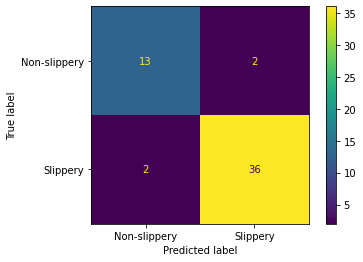

SVC confusion matrix


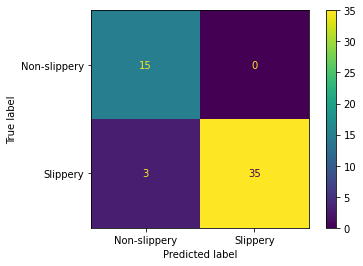

Decision tree classifier confusion matrix


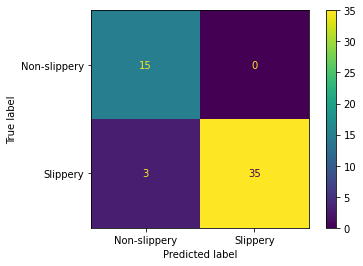

Random forest classifier confusion matrix


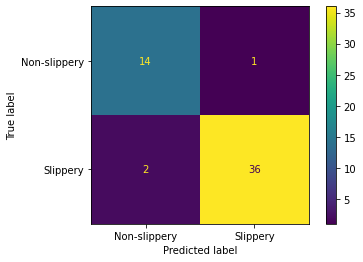

Extra trees classifier confusion matrix


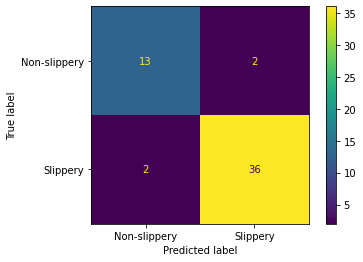

NaiveBayes classifier confusion matrix


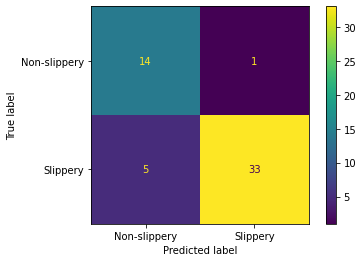

In [47]:
#%matplotlib inline

print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)
plt.show()


print("SVC confusion matrix")
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

print("Decision tree classifier confusion matrix")
plot_confusion_matrix(treeclf, x_test, y_test)
plt.show()

print("Random forest classifier confusion matrix")
plot_confusion_matrix(rforestclf, x_test, y_test)
plt.show()

print("Extra trees classifier confusion matrix")
plot_confusion_matrix(forestclf, x_test, y_test)
plt.show()

print("NaiveBayes classifier confusion matrix")
plot_confusion_matrix(nbclf, x_test, y_test)
plt.show()

In [48]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy knn: ", np.round(accuracy_score(y_test, y_pred_knn),2))
print("Accuracy svc: ", np.round(accuracy_score(y_test, y_pred_svc),2))
print("Accuracy Tree : ", np.round(accuracy_score(y_test, y_pred_tree),2))
print("Accuracy Random forest : ", np.round(accuracy_score(y_test, y_pred_rforest),2))
print("Accuracy Extra Trees : ", np.round(accuracy_score(y_test, y_pred_forest),2))

print("----------")

print("Precision knn: ", np.round(precision_score(y_test, y_pred_knn, average='macro'),2))
print("Precision svc: ", np.round(precision_score(y_test, y_pred_svc, average = 'macro'),2))
print("Precision Tree: ", np.round(precision_score(y_test, y_pred_tree, average = 'macro'),2))
print("Precision Random Forest: ", np.round(precision_score(y_test, y_pred_rforest, average = 'macro'),2))
print("Precision trees: ", np.round(precision_score(y_test, y_pred_forest, average = 'macro'),2))

print("----------")

print("Recall knn: ", np.round(recall_score(y_test, y_pred_knn, average = 'macro'),2))
print("Recall svc: ", np.round(recall_score(y_test, y_pred_svc, average = 'macro'),2))     
print("Recall tree: ", np.round(recall_score(y_test, y_pred_tree, average = 'macro'),2))  
print("Recall forest: ", np.round(recall_score(y_test, y_pred_rforest, average = 'macro'),2))     
print("Recall trees: ", np.round(recall_score(y_test, y_pred_forest, average = 'macro'),2)) 

print("----------")
 
print("F1 knn: ", np.round(f1_score(y_test, y_pred_knn, average = 'macro'),2))
print("F1 svc: ", np.round(f1_score(y_test, y_pred_svc, average = 'macro'),2))            
print("F1 tree: ", np.round(f1_score(y_test, y_pred_tree, average = 'macro'),2))  
print("F1 forest: ", np.round(f1_score(y_test, y_pred_rforest, average = 'macro'),2))  

print("F1 trees: ", np.round(f1_score(y_test, y_pred_forest, average = 'macro'),2))  

Accuracy knn:  0.92
Accuracy svc:  0.94
Accuracy Tree :  0.94
Accuracy Random forest :  0.94
Accuracy Extra Trees :  0.92
----------
Precision knn:  0.91
Precision svc:  0.92
Precision Tree:  0.92
Precision Random Forest:  0.92
Precision trees:  0.91
----------
Recall knn:  0.91
Recall svc:  0.96
Recall tree:  0.94
Recall forest:  0.94
Recall trees:  0.91
----------
F1 knn:  0.91
F1 svc:  0.93
F1 tree:  0.93
F1 forest:  0.93
F1 trees:  0.91


In [49]:
model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy knn:', round(np.mean(scores)*100,1), '%')


model = sklearn.svm.SVC(kernel='linear') 
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy svc:', round(np.mean(scores)*100,1), '%')


model = tree.DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
print('Accuracy tree:', round(np.mean(scores)*100,1), '%')


# model = RandomForestClassifier(n_estimators = 500)
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
# print('Accuracy forest:', round(np.mean(scores)*100,1), '%')



# model = ExtraTreesClassifier(n_estimators = 500)
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

# print('Accuracy extra trees:', round(np.mean(scores)*100,1), '%')

Accuracy knn: 88.7 %
Accuracy svc: 90.6 %
Accuracy tree: 84.9 %


In [50]:
X

,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,0.469569,-0.514985,-1.408028,-1.379385,-0.892950,-0.900465,-0.892950,-0.900465,-0.470716,-0.478863,-0.556568,-0.514985
1,-1.018446,1.860485,-0.707482,-0.829929,-1.008649,-1.170981,-1.008649,-1.170981,-0.489942,-0.799062,1.762788,1.860486
2,-1.237697,1.931734,-0.197839,-0.281916,-0.647887,-1.017781,-0.647887,-1.017781,-0.259284,-1.074568,1.865517,1.931734
3,-1.329586,1.752322,0.076584,0.031029,-0.873843,-0.955202,-0.873843,-0.955202,-0.906625,-1.156973,1.829442,1.752322
4,-1.178341,1.364588,0.269192,0.377142,-0.874238,-0.805233,-0.874238,-0.805233,-1.236599,-1.015062,1.412971,1.364588
...,...,...,...,...,...,...,...,...,...,...,...,...
43,-0.258776,-0.003454,0.736223,0.199759,-0.850461,-0.877900,-0.850461,-0.877900,-1.128251,-0.910273,-0.184526,-0.003454
44,-0.474476,0.165159,0.483958,-0.042520,-0.924176,-0.952998,-0.924176,-0.952998,-1.169455,-0.965660,-0.032949,0.165159
45,-0.490561,0.217800,0.165218,-0.147797,-0.985284,-1.004104,-0.985284,-1.004104,-1.168996,-1.005716,0.052737,0.217800
46,-0.497899,0.246753,0.175445,-0.204040,-0.953000,-0.994135,-0.953000,-0.994135,-1.092109,-0.929431,0.055056,0.246753


In [127]:
features

['RMS',
 'RMSf',
 'Spec',
 'Specf',
 'ZC',
 'ZCf',
 'Specslo',
 'Specslof',
 'Specspr',
 'Specsprf',
 'STD',
 'STDf']

In [128]:
alldf

,Surface,RMS,RMSf,ZC,ZCf,Spec,Specf,Specslo,Specslof,Specspr,Specsprf,STD,STDf
0,Wet Asphalt,0.636991,-0.909537,-1.776822,-1.970302,-1.436763,-1.451934,-0.277799,-0.296562,-0.671288,-0.752975,-0.932151,-0.909537
1,Wet Asphalt,0.179694,-0.795452,-1.609772,-1.678002,-1.602796,-1.544345,-0.489709,-0.406159,-1.160694,-1.059778,-0.775480,-0.795452
2,Wet Asphalt,0.122326,-0.674255,-1.489207,-1.564362,-1.332246,-1.373932,-0.144402,-0.204052,-0.564559,-0.896966,-0.652589,-0.674255
3,Wet Asphalt,-0.159926,-0.517573,-1.640515,-1.721935,-1.604402,-1.497758,-0.491759,-0.350907,-1.145385,-0.828780,-0.448782,-0.517573
4,Wet Asphalt,-0.238222,-0.523400,-1.795157,-1.823078,-1.660792,-1.546567,-0.563729,-0.408794,-1.130075,-0.932176,-0.415016,-0.523400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Dry Asphalt,1.137249,-0.968632,1.020432,0.982384,0.498121,0.390345,0.129511,-0.006529,0.326647,0.353976,-1.040439,-0.968632
665,Dry Asphalt,0.614169,-0.435030,1.026914,0.950166,0.524241,0.449193,0.165181,0.068150,0.261300,0.276181,-0.497996,-0.435030
666,Dry Asphalt,-0.593662,0.207291,0.435572,0.454602,-0.228514,-0.280964,-0.862822,-0.858418,-0.584690,-0.680135,0.225667,0.207291
667,Dry Asphalt,-0.641654,0.622580,0.765412,0.746903,-0.042689,-0.086110,-0.609049,-0.611148,-0.694372,-0.673102,0.621277,0.622580


## Unsupervised ML

<IPython.core.display.Javascript object>


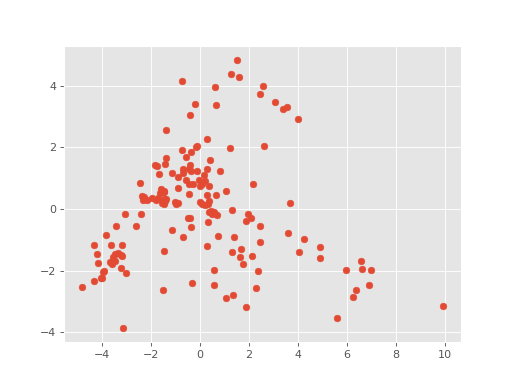

In [53]:
# Import whatever libraries, modules, etc. you may need here.

import scipy as sp
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

X =  alldf[features]
Y = alldf["Surface"]

X = X.apply(sp.stats.zscore) # z-standardization


#PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
plt.figure()
plt.scatter(X_r[:,0],X_r[:,1])
plt.show()

In [54]:
Y

0         Slippery
1         Slippery
2         Slippery
3         Slippery
4         Slippery
          ...     
43    Non-slippery
44    Non-slippery
45    Non-slippery
46    Non-slippery
47    Non-slippery
Name: Surface, Length: 159, dtype: object

In [55]:
Y = pd.factorize(Y)[0]

<IPython.core.display.Javascript object>


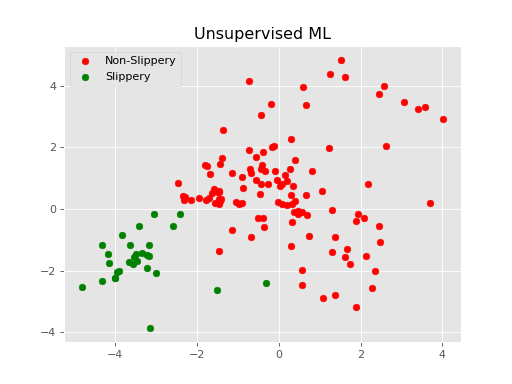

<IPython.core.display.Javascript object>


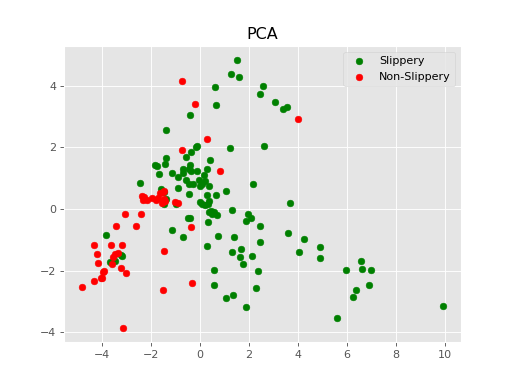

Rand score: 0.23170209943246797


In [56]:


# clustering with ward method
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
clustering_labels = clustering.labels_

# PCA
pca=PCA(n_components=3)
X_r = pca.fit_transform(X)


plt.figure()
# plot the predicted clusters 
for i in range(len(clustering_labels)):
    labels = list(set(clustering_labels))
    if clustering_labels[i] == labels[2]:
        plt.scatter(X_r[i,0],X_r[i,1], color='g', label="Slippery")
        
    if clustering_labels[i] == labels[0]:
        plt.scatter(X_r[i,0],X_r[i,1], color='r', label="Non-Slippery")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Unsupervised ML")
plt.show()

plt.figure()
# plot the correct types
for i in range(len(Y)):
    labels = list(set(Y))
    if Y[i] == labels[0]:
        plt.scatter(X_r[i,0],X_r[i,1], color='g', label="Slippery")
    if Y[i] == labels[1]:
        plt.scatter(X_r[i,0],X_r[i,1], color='r', label="Non-Slippery")

        
plt.title("PCA")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

rand = adjusted_rand_score(Y, clustering_labels)
print('Rand score:', rand)


In [51]:
%matplotlib notebook
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


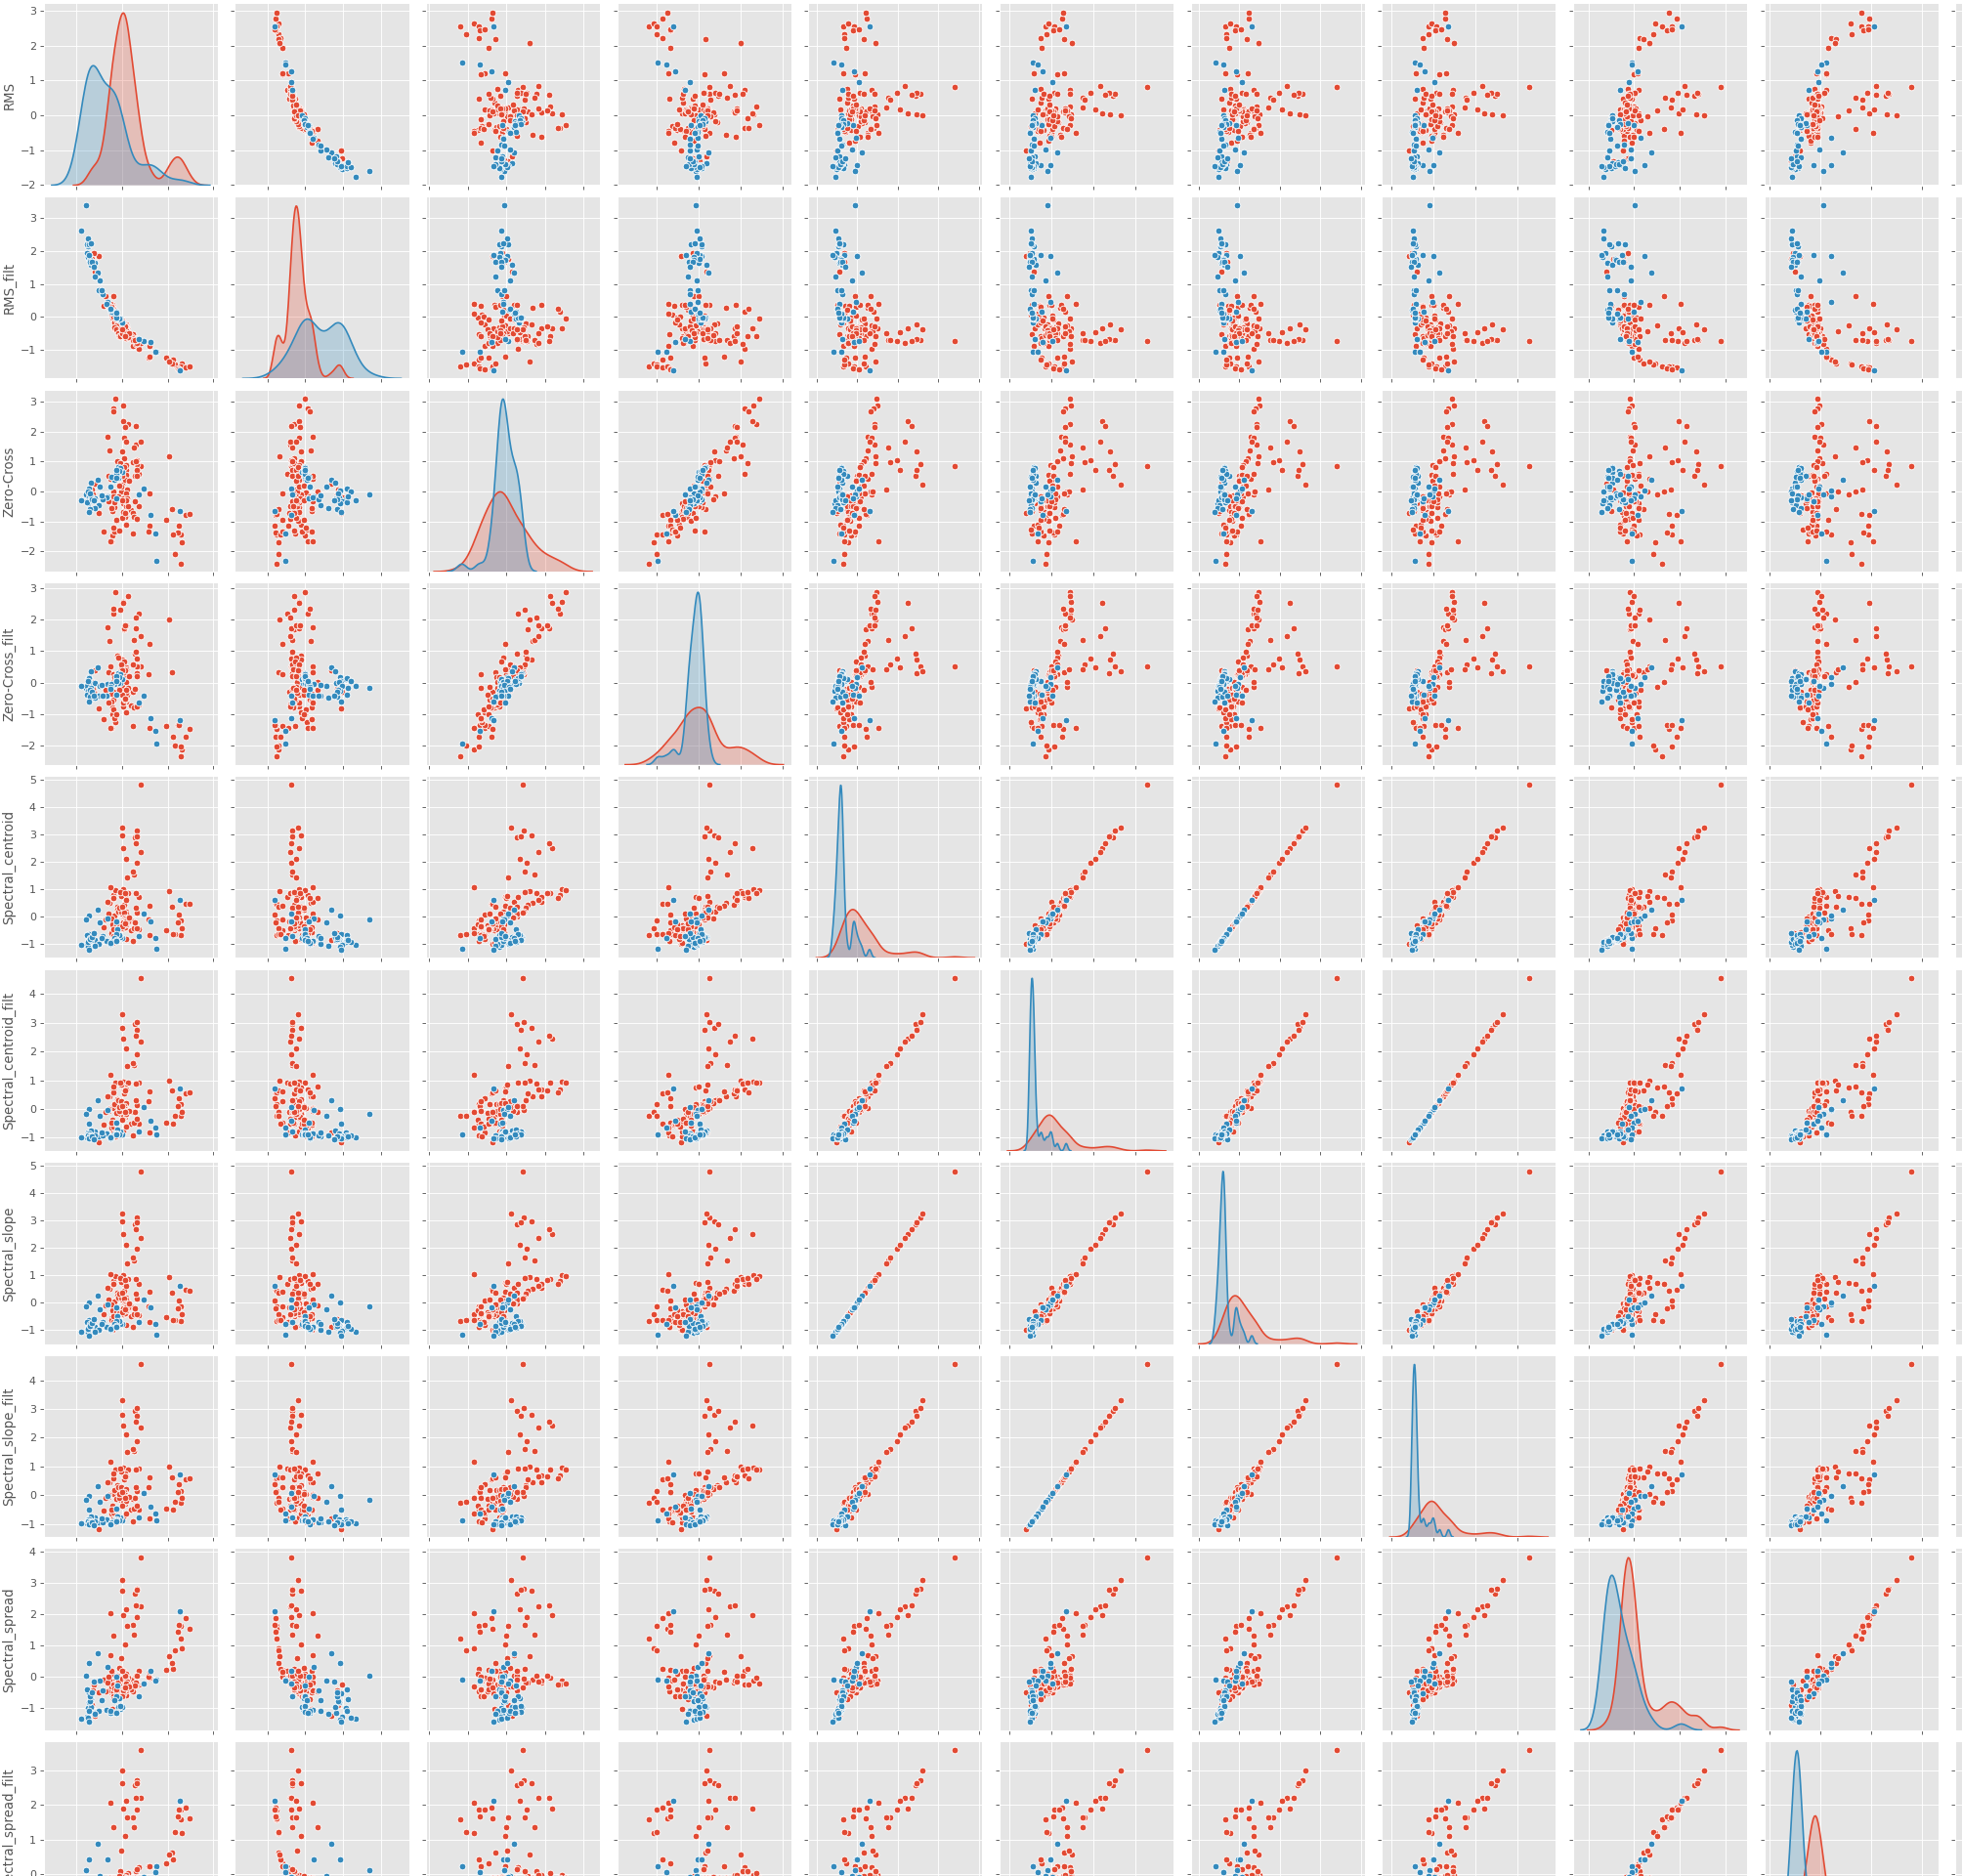

In [52]:

sns.pairplot(alldf, hue='Surface')